<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization __[X]__
- Custom stopword removal __[X]__

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

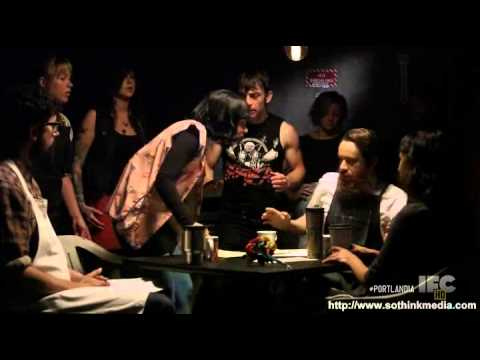

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonfinger/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Import Packages

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [5]:
# Bring the handy counting function from lecture
from collections import Counter
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with 
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [6]:
# Cleaning up data

# Removing dates from  using reg ex
new_review = []
for shop in shops['full_review_text']:
    shop = shop.lower().lstrip()
    subbed_sample = (re.sub('[^a-zA-Z ]', '', shop))
    new_review.append(subbed_sample)
shops['review_no_date'] = new_review
shops.head(10)


,coffee_shop_name,full_review_text,star_rating,review_no_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,checkin very cute cafe i think from the mome...
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating,checkins listed in nuptial coffee bliss ande...
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,checkins love this place stars for cleanli...
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,checkin ok lets try this approach pros musi...
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,checkins this place has been shown on my soc...


In [38]:
#Remove words from star_rating
new_rating = []
for shop in shops['star_rating']:
    subbed_review = re.sub('[^1-9 ]', '', shop)
    subbed_review = int(subbed_review)
    new_rating.append(subbed_review)
shops['pure_rating'] = new_rating
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating,spaCy_review_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5,"[love, love, loved, atmosphere, corner, coffee...","[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...,2,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f..."


In [8]:
# Load spacy model
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [9]:
# Adding to stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['checkin',' ', '  ', '    ', '   '])


In [10]:
# Print out list of tokens
# Make them tokens using the Tokenizer Pipe

tokens = []
for doc in tokenizer.pipe(shops['review_no_date'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)

shops['spaCy_review_tokens'] = tokens
shops['spaCy_review_tokens'].head()


0    [love, love, loved, atmosphere, corner, coffee...
1    [listed, date, night, austin, ambiance, austin...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [located, northcross, mall, shopping, center, ...
Name: spaCy_review_tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count __[X]__
- View Word/Token Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [11]:
# Shape and head of new tokens
wc = count(shops['spaCy_review_tokens'])
print(wc.shape)
wc.head()

(19565, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,coffee,4877,10354,1.0,0.028850,0.028850,0.640362
115,place,3659,5426,2.0,0.015119,0.043969,0.480436
150,good,2788,3973,3.0,0.011070,0.055039,0.366071
138,great,2836,3919,4.0,0.010920,0.065959,0.372374
155,like,2124,3088,5.0,0.008604,0.074563,0.278887


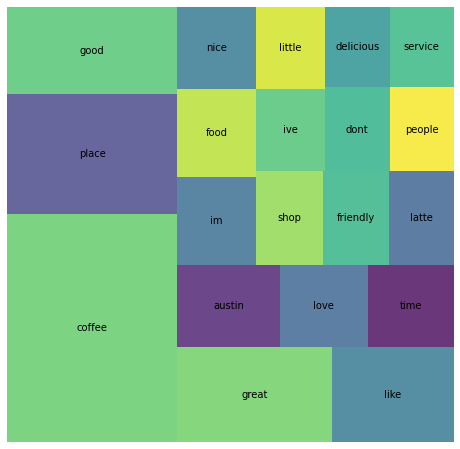

In [12]:
# See a squarify word cloud (top 20) for the reviews
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [13]:
# Let's try lemmatizing it
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [14]:
# # Create column of review lemmas for both good and bad

shops['lemmas'] = shops['review_no_date'].apply(get_lemmas)
shops['lemmas'].head()

0    [love, love, love, atmosphere, corner, coffee,...
1    [list, date, night, austin, ambiance, austin, ...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

In [42]:
# Create a copy of the shops df and add column with good or bad
df = shops.copy()
df.loc[df['pure_rating'] >= 3, 'good_bad'] = 'Good'
df.loc[df['pure_rating'] < 3, 'good_bad'] = 'Bad'
print(df.shape)
df.head()

(7616, 8)


,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating,spaCy_review_tokens,lemmas,good_bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5,"[love, love, loved, atmosphere, corner, coffee...","[love, love, love, atmosphere, corner, coffee,...",Good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ...",Good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl...",Good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...,2,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over...",Bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f...",Good


In [44]:
df_good = df[df['good_bad'] == 'Good']
df_good.head()

,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating,spaCy_review_tokens,lemmas,good_bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5,"[love, love, loved, atmosphere, corner, coffee...","[love, love, love, atmosphere, corner, coffee,...",Good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ...",Good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl...",Good
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f...",Good
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,checkin very cute cafe i think from the mome...,4,"[cute, cafe, think, moment, stepped, wasnt, di...","[cute, cafe, think, moment, step, not, not, fi...",Good


In [54]:
# Create df for each prure rating
df_1 = df[df['pure_rating'] == 1]
df_2 = df[df['pure_rating'] == 2]
df_3 = df[df['pure_rating'] == 3]
df_4 = df[df['pure_rating'] == 4]
df_5 = df[df['pure_rating'] == 5]

In [62]:
# Create word count for each rating
wc_1 = count(df_1['lemmas'])
wc_2 = count(df_2['lemmas'])
wc_3 = count(df_3['lemmas'])
wc_4 = count(df_4['lemmas'])
wc_5 = count(df_5['lemmas'])

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15,coffee,303,664,1.0,0.026445,0.026445,0.658696
95,not,270,557,2.0,0.022183,0.048628,0.586957
23,place,233,386,3.0,0.015373,0.064001,0.506522
13,like,189,303,4.0,0.012067,0.076068,0.410870
8,good,208,293,5.0,0.011669,0.087737,0.452174
133,order,156,284,6.0,0.011311,0.099048,0.339130
10,drink,127,223,7.0,0.008881,0.107929,0.276087
41,come,145,217,8.0,0.008642,0.116572,0.315217
160,time,136,203,9.0,0.008085,0.124656,0.295652
39,have,112,157,10.0,0.006253,0.130909,0.243478


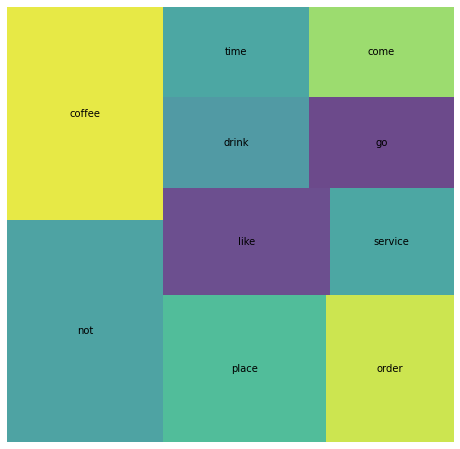

In [63]:
# See a squarify word cloud (top 10) for the 1 star reviews
wc1_top10 = wc_1[wc_1['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc1_top10['pct_total'], label=wc1_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

(0.0, 100.0, 0.0, 100.0)

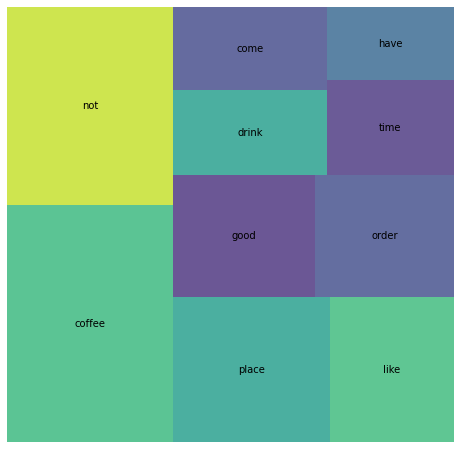

In [64]:
# See a squarify word cloud (top 10) for the 2 star reviews
wc2_top10 = wc_2[wc_2['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc2_top10['pct_total'], label=wc2_top10['word'], alpha=.8 )
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

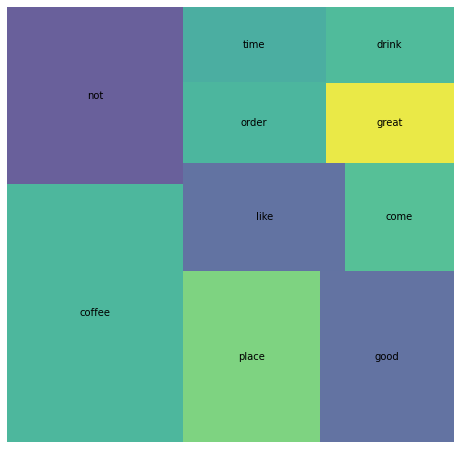

In [65]:
# See a squarify word cloud (top 10) for the 3 star reviews
wc3_top10 = wc_3[wc_3['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc3_top10['pct_total'], label=wc3_top10['word'], alpha=.8 )
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

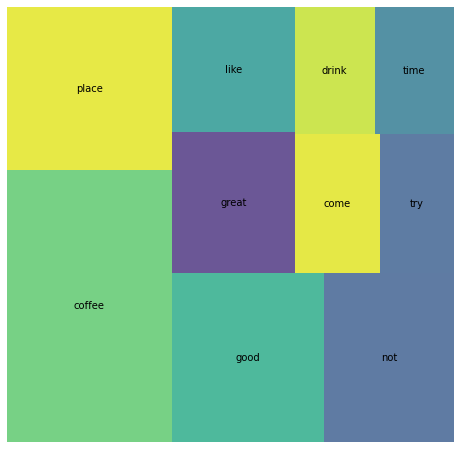

In [66]:
# See a squarify word cloud (top 10) for the 4 star reviews
wc4_top10 = wc_4[wc_4['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc4_top10['pct_total'], label=wc4_top10['word'], alpha=.8 )
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

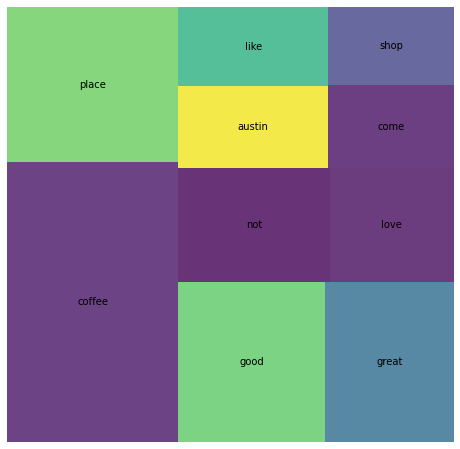

In [67]:
# See a squarify word cloud (top 10) for the 5 star reviews
wc5_top10 = wc_5[wc_5['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc5_top10['pct_total'], label=wc5_top10['word'], alpha=.8 )
plt.axis('off')

## Can we visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


(0.0, 100.0, 0.0, 100.0)

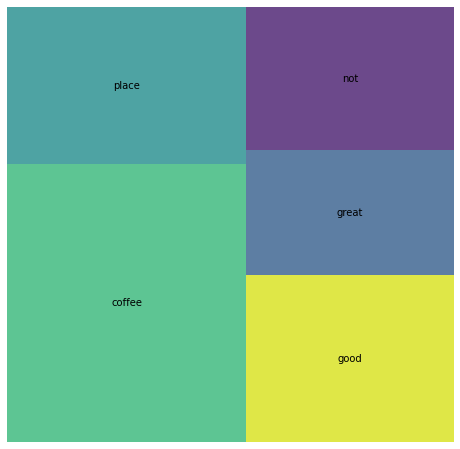

In [136]:
# Create dfs for good and bad reviews
df_good = df[df['good_bad'] == "Good"]
df_bad = df[df['good_bad'] == "Bad"]
wc_good = count(df_good['lemmas'])
wc_bad = count(df_bad['lemmas'])

# See a squarify word cloud (top 10) for the 5 star reviews
wc_good_top05 = wc_good_top05.sort_values(by='appears_in_pct', ascending=False)
wc_good_top05 = wc_good_top05.head(5)

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_good_top05['pct_total'], label=wc_good_top05['word'], alpha=.8 )
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

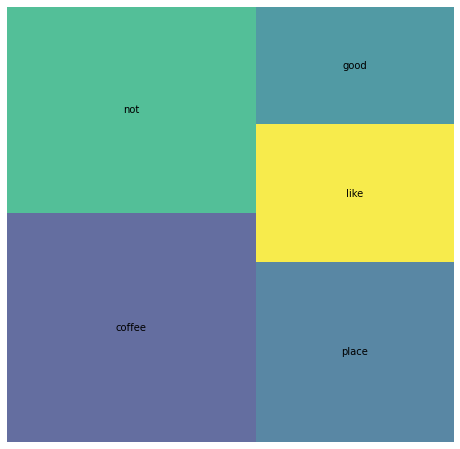

In [137]:
# See a squarify word cloud (top 10) for the 5 star reviews
wc_bad_top05 = wc_bad_top05.sort_values(by='appears_in_pct', ascending=False)
wc_bad_top05 = wc_bad_top05.head(5)

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_bad_top05['pct_total'], label=wc_bad_top05['word'], alpha=.8 )
plt.axis('off')

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

